# Predição de pagamento de empréstimos

![](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExcHBibDB4cDhldmdqbGJtcGp0ZGF0MmYycnh2YXpwcDBmOXFsMnR2cyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3orifdO6eKr9YBdOBq/giphy.gif)

In [1]:
# Pacotes básicos

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
from google.colab import files
upload = files.upload()

Saving credtest.txt to credtest.txt
Saving credtrain.txt to credtrain.txt


In [3]:
df = pd.read_csv('/content/credtest.txt', sep= '\t', header= None)


In [4]:
df_train = pd.read_csv('/content/credtrain.txt', sep= '\t', header= None)

In [5]:
df.columns = ['ESCT', 'NDEP', 'RENDA', 'TIPOR', 'VBEM', 'NPARC', 'VPACR', 'TEL', 'IDADE', 'RESMS', 'ENTRADA', 'CLASSE']
df_train.columns = ['ESCT', 'NDEP', 'RENDA', 'TIPOR', 'VBEM', 'NPARC', 'VPACR', 'TEL', 'IDADE', 'RESMS', 'ENTRADA', 'CLASSE']

In [6]:
df.head()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPACR,TEL,IDADE,RESMS,ENTRADA,CLASSE
0,0,2,500,1,618,10,85,0,36,6,0,0
1,1,0,813,0,552,4,119,0,43,48,119,1
2,3,0,350,0,488,12,66,0,43,0,0,1
3,1,0,1530,0,381,1,398,0,28,48,0,1
4,0,0,688,1,396,10,60,0,49,72,0,1


In [7]:
df_train.head()

,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPACR,TEL,IDADE,RESMS,ENTRADA,CLASSE
0,1,0,360,0,313,9,52,0,25,48,0,1
1,0,0,350,1,468,10,65,0,33,6,0,1
2,0,0,1100,0,829,9,125,0,56,48,0,1
3,0,0,3000,0,552,12,76,1,31,60,0,1
4,1,0,1000,0,809,12,111,0,24,7,0,1


In [8]:
# número de linhas e colunas da base
print(f"A base de dados possui {df.shape[0]} linhas e {df.shape[1]} colunas")

A base de dados possui 577 linhas e 12 colunas


In [9]:
# explorando variáveis
df.describe()


,ESCT,NDEP,RENDA,TIPOR,VBEM,NPARC,VPACR,TEL,IDADE,RESMS,ENTRADA,CLASSE
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,0.547660,0.110919,930.623917,0.452340,568.377816,8.402080,103.755633,0.112652,41.188908,29.270364,26.528596,0.469671
std,0.710706,0.511841,876.614452,0.498155,352.600280,3.633065,67.692428,0.316441,13.477631,50.100313,90.786052,0.499512
min,0.000000,0.000000,300.000000,0.000000,300.000000,1.000000,50.000000,0.000000,18.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,475.000000,0.000000,399.000000,6.000000,66.000000,0.000000,30.000000,6.000000,0.000000,0.000000
50%,0.000000,0.000000,600.000000,0.000000,489.000000,10.000000,85.000000,0.000000,39.000000,6.000000,0.000000,0.000000
75%,1.000000,0.000000,1000.000000,1.000000,623.000000,10.000000,117.000000,0.000000,52.000000,48.000000,0.000000,1.000000
max,3.000000,5.000000,9675.000000,1.000000,6000.000000,21.000000,719.000000,1.000000,70.000000,360.000000,1150.000000,1.000000


array([[<Axes: title={'center': 'ESCT'}>,
        <Axes: title={'center': 'NDEP'}>,
        <Axes: title={'center': 'RENDA'}>],
       [<Axes: title={'center': 'TIPOR'}>,
        <Axes: title={'center': 'VBEM'}>,
        <Axes: title={'center': 'NPARC'}>],
       [<Axes: title={'center': 'VPACR'}>,
        <Axes: title={'center': 'TEL'}>,
        <Axes: title={'center': 'IDADE'}>],
       [<Axes: title={'center': 'RESMS'}>,
        <Axes: title={'center': 'ENTRADA'}>,
        <Axes: title={'center': 'CLASSE'}>]], dtype=object)

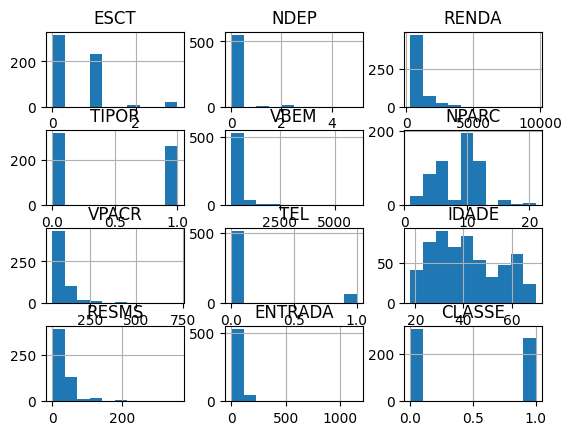

In [10]:
df.hist()

In [11]:
# Dividindo o dataset entre features e target (y)
X_train = df_train.drop('CLASSE', axis=1)
y_train = df_train['CLASSE']

X_test = df.drop('CLASSE', axis=1)
y_test = df['CLASSE']


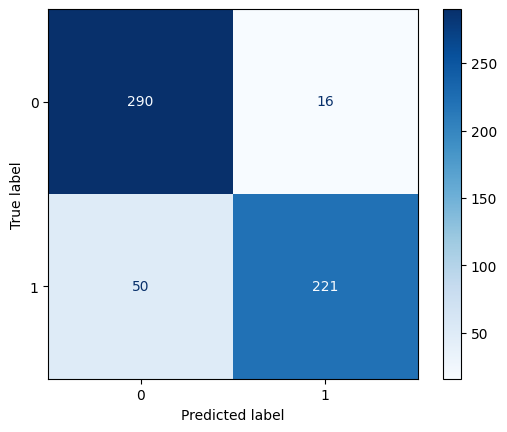

Accuracy: 88.56%
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       306
           1       0.93      0.82      0.87       271

    accuracy                           0.89       577
   macro avg       0.89      0.88      0.88       577
weighted avg       0.89      0.89      0.88       577



In [12]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


# Criando e Treinando o modelo
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)

# Predições no conjunto de teste
y_pred = model.predict(X_test)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)

confusion = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion).plot(cmap='Blues')
plt.show()

classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_rep)



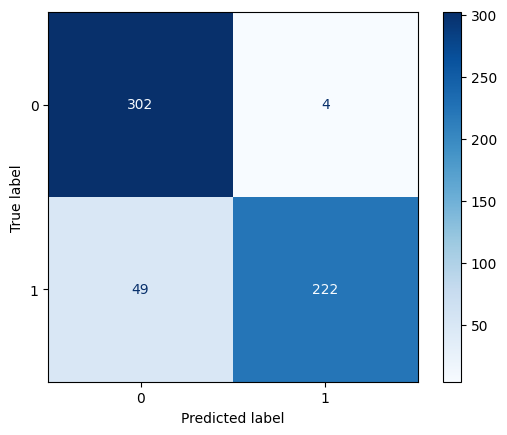

Accuracy on test set: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       306
           1       0.98      0.82      0.89       271

    accuracy                           0.91       577
   macro avg       0.92      0.90      0.91       577
weighted avg       0.92      0.91      0.91       577



In [13]:
#Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Criando e Treinando o modelo
tree = DecisionTreeClassifier(criterion='gini',
                              max_depth=4,
                           random_state=1)
tree.fit(X_train, y_train)

#Predições no conjunto de teste
y_pred = tree.predict(X_test)

#Avaliação do modelo

confusion = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion).plot(cmap='Blues')
plt.show()

classification_rep = classification_report(y_test, y_pred)

print('Accuracy on test set: %.2f' % accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_rep)

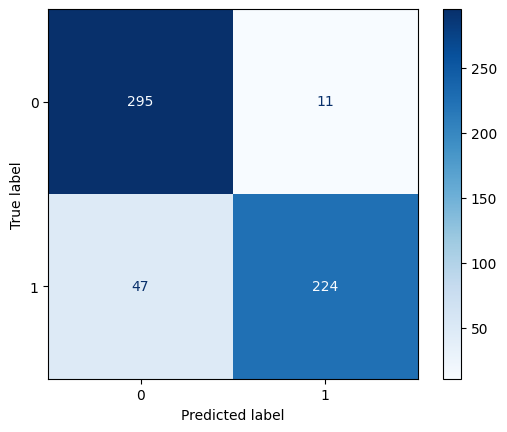

Test Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       306
           1       0.95      0.83      0.89       271

    accuracy                           0.90       577
   macro avg       0.91      0.90      0.90       577
weighted avg       0.91      0.90      0.90       577



In [14]:
#Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report


# Treinando modelo
forest = RandomForestClassifier(n_estimators=100,
                                random_state=1)

forest.fit(X_train, y_train)

#Predição
y_pred = forest.predict(X_test)

#Avaliação do modelo

confusion = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion).plot(cmap='Blues')
plt.show()

classification_rep = classification_report(y_test, y_pred)

print("Test Accuracy: %0.2f" % accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_rep)



Test Accuracy: 0.59


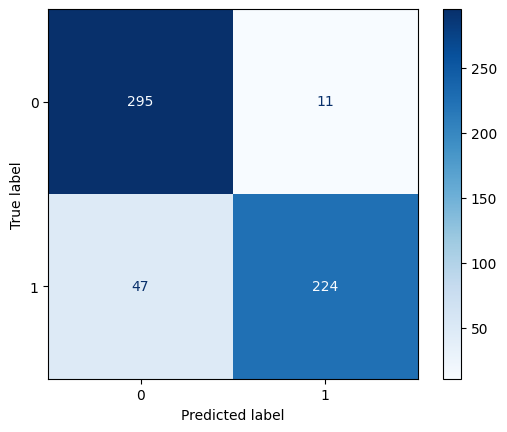

Test Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       306
           1       0.95      0.83      0.89       271

    accuracy                           0.90       577
   macro avg       0.91      0.90      0.90       577
weighted avg       0.91      0.90      0.90       577



In [16]:
#KNeighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay, classification_report

#Treinando modelo

modelKNN = KNeighborsClassifier(n_neighbors=3) # k = 3

modelKNN.fit(X_train, y_train)

print("Test Accuracy: %0.2f" % modelKNN.score(X_test, y_test))

#Avaliação do modelo

confusion = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion).plot(cmap='Blues')
plt.show()

classification_rep = classification_report(y_test, y_pred)

print("Test Accuracy: %0.2f" % accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_rep)


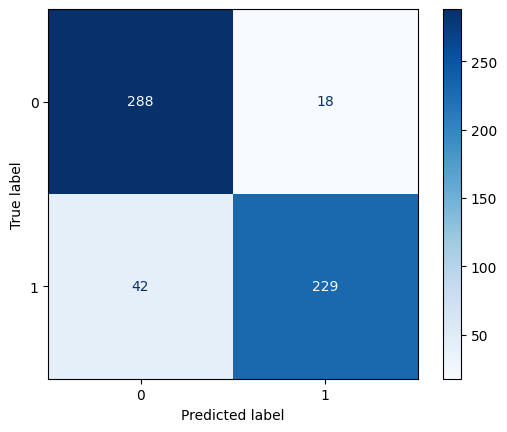

Test Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.91       306
           1       0.93      0.85      0.88       271

    accuracy                           0.90       577
   macro avg       0.90      0.89      0.89       577
weighted avg       0.90      0.90      0.90       577



In [17]:
#Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

#Treinando modelo
boost = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=8,
    random_state=1)

boost.fit(X_train, y_train)

#Predição
y_pred = boost.predict(X_test)

#Avaliação do modelo

confusion = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion).plot(cmap='Blues')
plt.show()

classification_rep = classification_report(y_test, y_pred)

print("Test Accuracy: %0.2f" % accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_rep)